# Binaryzacja


### Cel:
- zapoznanie z segmentacją obiektów poprzez binaryzację,
- zapoznanie z binaryzacją na podstawie histogramu (globalną),
- zapoznanie z metodami automatycznego wyznaczania progu Otsu, Kitllera i Kapura,
- zapoznanie z binaryzacją lokalną (na podstawie średniej i metodą Sauvoli),
- zapoznanie z binaryzacją dwuprogową,
- zadanie domowe: zapoznanie z adaptacyjną binaryzacją lokalną.

### Binaryzacja - wprowadzenie

Jednym z najważniejszych etapów podczas analizy obrazów jest segmentacja -- podział obrazu na rejony według pewnego kryterium  -- jasności, koloru, tekstury.
Najprostszą (i też najczęściej wykorzystywaną) metodą segmentacji jest **binaryzacja**. 
Do jej głównych zalet zalicza się: intuicyjność, prostotę, łatwość implementacji i szybkość wykonywania. 
Jest ona etapem wielu algorytmów analizy obrazów. 
Pozwala na znaczną redukcję informacji w obrazie (np. dla wejściowego obrazu w skali szarości z zakresu 0-255 do 0-1).
 
Binaryzacja najczęściej realizowana jest poprzez progowanie. 
Na przykład: dla obrazu w odcieniach szarości ustala się próg na poziomie $k$. 
Wszystkie piksele o wartości (jasności) większej od $k$ zostają uznane za obiekty, a pozostałe za tło. 
Oczywiście podejście takie daje się zastosować wtedy, gdy obiekty mają istotnie różną jasność od otaczającego je tła.


### Binaryzacja na podstawie histogramu

W rozdziale zostanie zademonstrowane wyznaczanie progu na podstawie "ręcznej" analizy histogramu oraz wpływ szumu i niejednorodnego oświetlenia sceny na proces binaryzacji.

1. Potrzebne w ćwiczeniu moduły są już wpisane - zwróć uwagę pod jakimi nazwami będą one widziane (plt, cv2, np).

2. Wczytaj obraz _coins.png_ w trybie odcieni szarości. Wyświetl go. 
Wyznacz jego histogram (funkcja `np.histogram` lub 'cv2.calcHist') i wyświetl go.
Przy wyświetlaniu histogramu warto zwiększyć liczbę wyświetlanych wartości na osi x oraz powiększyć sam wykres (funkcje *plt.xticks(np.arange(0, 256, 20.0))* oraz *plt.rcParams["figure.figsize"] = (10,5)*.
Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.
      


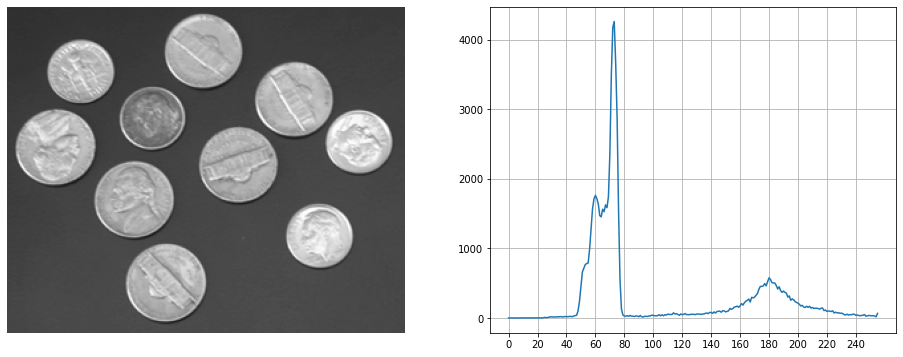

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("coins.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/coins.png --no-check-certificate
if not os.path.exists("rice.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/rice.png --no-check-certificate
if not os.path.exists("catalogue.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/catalogue.png --no-check-certificate
if not os.path.exists("bart.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/bart.png --no-check-certificate
if not os.path.exists("figura1.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura1.png --no-check-certificate
if not os.path.exists("figura2.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura2.png --no-check-certificate
if not os.path.exists("figura3.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura3.png --no-check-certificate
if not os.path.exists("figura4.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura4.png --no-check-certificate


def img_and_histogram(image):
    H = cv2.calcHist([image],[0],None, [256],[0,256])
    figHist1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
    ax1.imshow(image, 'gray', vmin=0, vmax=256)
    ax1.axis('off')
    ax2.plot(H)
    plt.xticks(np.arange(0, 256, 20.0))
    plt.rcParams["figure.figsize"] = (10,5)
    ax2.grid()

        
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
img_and_histogram(coins)


3. Wizualna analiza histogramu pozwala zauważyć dwa maksima - jedno odpowiadające poziomowi jasności tła (które w tym przypadku jest względnie jednolite - ciemnoszare) i drugie odpowiadające monetom.

Na podstawie histogramu wyznacz próg i wykonaj binaryzację:
- wykorzystaj fakt, że dla macierzy *numpy* można wykonać operację porównania wszystkich jej wartości z liczbą  - wynikiem jest macierz zawierająca wartości *True* i *False*, którą można przekonwertować metodą macierz.astype(np.int) na macierz z wartościami 1 i 0 (aczkolwiek nie jest to tu konieczne).
- wynik binaryzacji wyświetl,
- spróbuj dobrać jak najlepszy próg binaryzacji. Jako "kryterium jakości" przyjmij kształty monet - dla poprawnie dobranego progu powinny to być wypełnione koła.

Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.

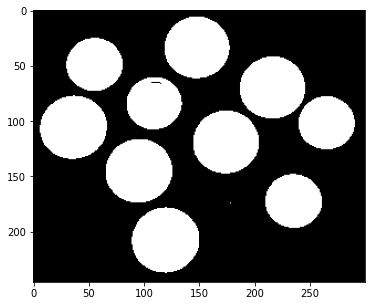

In [2]:
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
def binaryzacja(image,thre):
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]):
            if image[i][j] < thre:
                image[i][j] = 0
            else:
                image[i][j] = 1
    
    #plt.imshow(image,'gray')
    #plt.show()
    return image


#for i in [10,20,30,40,50,60,70,80,100,200]:
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(binaryzacja(coins,90), "gray")
plt.show()



4. Na "stopień trudności" przeprowadzenia binaryzacji największy wpływ mają dwa czynniki:
- szum,
- niejednorodne oświetlenie.
	  
Użyj obrazy:
 - _figura1.png_ (bez zaszumienia),
 - _figura2.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 10),
 - _figura3.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 50),
 - _figura4.png_ (dodany gradient oświetlenia -- symulacja oświetlenia niejednorodnego) i wyświetl ich histogramy (wykorzystaj funkcję z poprzedniego punktu).


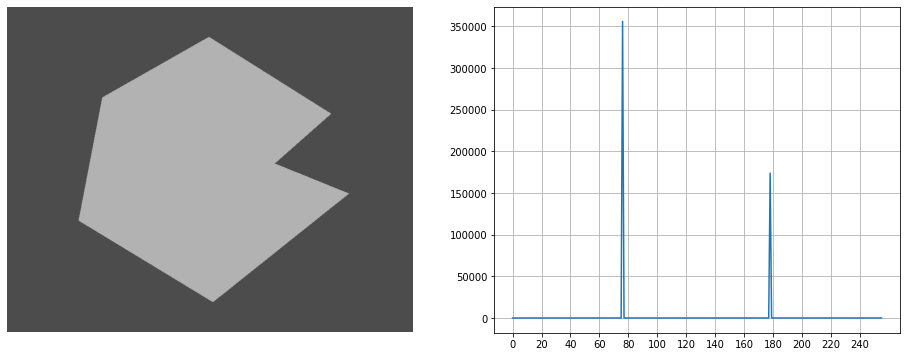

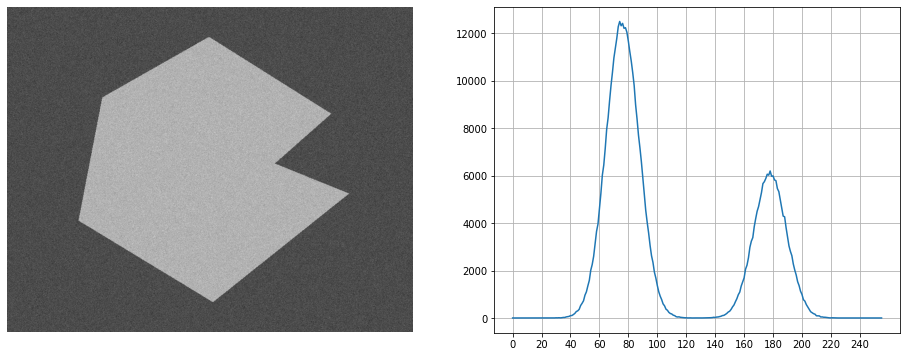

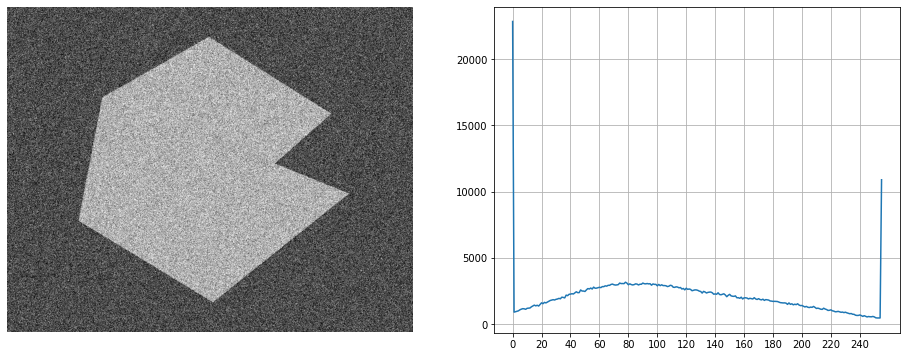

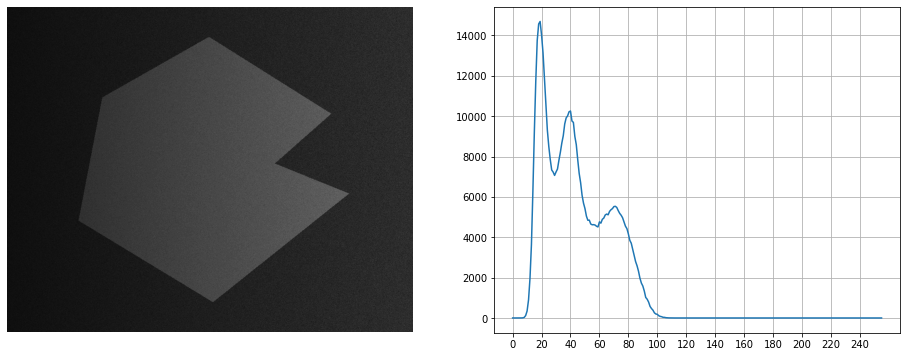

In [3]:
figura1 = cv2.imread("figura1.png", cv2.IMREAD_GRAYSCALE)
figura2 = cv2.imread("figura2.png", cv2.IMREAD_GRAYSCALE)
figura3 = cv2.imread("figura3.png", cv2.IMREAD_GRAYSCALE)
figura4 = cv2.imread("figura4.png", cv2.IMREAD_GRAYSCALE)

for i in [figura1,figura2, figura3,figura4]:
    img_and_histogram(i)
    

Spróbuj wyznaczyć progi binaryzacji na podstawie wyświetlonych histogramów.
Jak dodanie szumu wypłynęło na histogram i łatwość wyznaczania progu binaryzacji?
Czy jest to możliwe we wszystkich przypadkach?

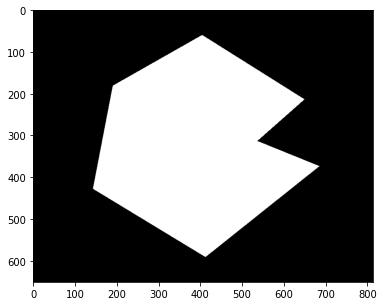

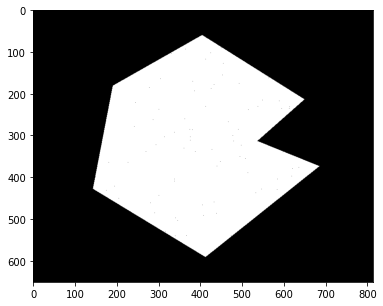

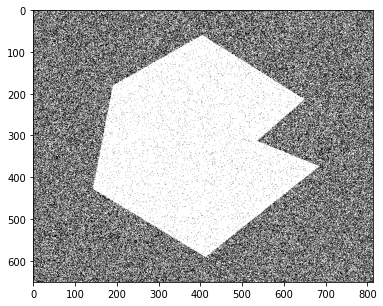

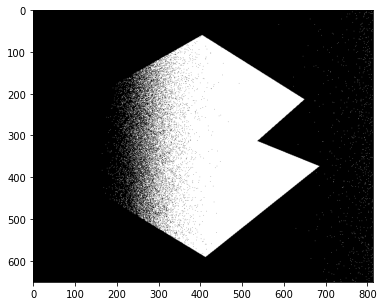

In [4]:
def show(image):
    plt.imshow(image,'gray')
    plt.show()


show(binaryzacja(figura1,170))
show(binaryzacja(figura2,140))
show(binaryzacja(figura3,80))
show(binaryzacja(figura4,60))


Dodanie szumu powoduje trudności w odczytaniu histogramu - powoduje to np. powstawanie więcej maksimów

### Automatyczne wyznaczanie progu binaryzacji

W automatycznym systemie analizy obrazów (działanie bez nadzoru operatora) konieczne jest zastosowanie metody binaryzacji, która w sposób automatyczny wyznacza próg binaryzacji.
Oczywiście można sobie wyobrazić użycie stałego progu (np. 10), ale wtedy należy zadbać o niezmienność warunków oświetleniowych, co w niektórych zastosowaniach może być problematyczne.

#### Iteracyjne wyznaczenie progu

Jednym z najprostszych podejść jest iteracyjna procedura wyliczania progu.
Jako pierwsze przybliżenie progu ($k$) przyjmuje się średnia jasność na obrazie.
Następnie, na podstawie $k$,  dzieli się obraz na dwa podobrazy $I_0$ i  $I_1$ (dwie klasy $C_0$ i $C_1$).
Dla każdego z nich oblicza się średnią jasność: $m_0$ i $m_1$.
Jako nowy próg przyjmuje się:

\begin{equation}
k_{new} = \frac{m_0 + m_1}{2}
\tag{1}
\end{equation}

Procedurę kontynuuje się do momentu, aż różnica pomiędzy dwoma kolejnymi progami będzie mniejsza niż zadana wartość.


**Zadanie: zaimplementować opisany powyżej algorytm.**


Jak można zauważyć, do poprawnego działania metody potrzebne będzie obliczanie średniej jasności, również dla pewnych podobrazów.
Wykorzystamy do tego znormalizowany histogram:
\begin{equation}
\tag{2}
p_i = n_i/N,   \sum_{i=0}^L p_i = 1
\end{equation}
gdzie: $n_i$ liczba pikseli o jasności $i$ ($i = 0,1, ... L-1$) - histogram, $L$ - liczba poziomów jasności, $N$ - liczba pikseli na obrazie ($N = n_0 + n_1 + ... + n_{L-1}$).

Jeśli podzielimy obraz na dwie klasy $C_0$ i $C_1$ (tło i obiekty albo obiekty i tło) z progiem podziału oznaczonym jako $k$, to do klasy $C_0$ należeć będą piksele o poziomach $[0,k]$, a do klasy $C1$ piksele o poziomach $[k+1,L-1]$.

Wtedy prawdopodobieństwo, że piksel należy do klasy $C_0$ wynosi:
\begin{equation}
\tag{3}
P_0(k) = \sum_{i=0}^{k} p_i
\end{equation}

Podobnie prawdopodobieństwo, że należy do klasy $C_1$ wynosi:

\begin{equation}
\tag{4}
P_1(k) = \sum_{i=k+1}^{L-1} p_i = 1 - P_0(k)
\end{equation}

Średnią jasność pikseli należących do klasy $C_0$ można wyznaczyć na podstawie:

\begin{equation}
\tag{5}
m_0(k) = \sum_{i=0}^{k} iP(i|C_0)
\end{equation}

gdzie: $|$ oznacza prawdopodobieństwo warunkowe, a wyraz $P(i|C_0)$ - prawdopodobieństwo dla wartości $i$ pod warunkiem, że $i$ należy do klasy $C_0$.
Równanie to jest szczególnym przypadkiem wykorzystania momentów statystycznych do wyliczania pewnych parametrów statystycznych - w tym przypadku średniej.

Wykorzystując regułę Bayesa:

\begin{equation}
\tag{6}
P(A|B) = P(B|A)P(A)/P(B)
\end{equation}
możemy zapisać:

\begin{equation}
\tag{7}
m_0(k) = \sum_{i=0}^{k} i P(C_0|i)P(i)/P(C_0)
\end{equation}
Wyraz $P(C_0|i) = 1$, gdyż z założenia rozpatrujemy tylko piksele należące do klasy $C_0$.
Wyraz $P(i)$ stanowi $i$-ty element znormalizowanego histogramu tj. $P(i) = p_i$, a $P(C_0)$ to prawdopodobieństwo przynależności do klasy $C_0$ określone wcześniej $P(C_0) = P_0(k)$.
Ostatecznie możemy więc zapisać:

\begin{equation}
\tag{8}
m_0(k) = \frac{1}{P_0(k)} \sum_{i=0}^{k} i p_i
\end{equation}

Na podstawie analogicznych rozważań można wyprowadzić wzór na średnią jasności pikseli należących do klasy $C_1$:
\begin{equation}
\tag{9}
m_1(k) = \frac{1}{P_1(k)} \sum_{i=k+1}^{L-1} i p_i
\end{equation}

Średnia jasność całego obrazu dana jest zależnością:
\begin{equation}
\tag{10}
m_G = \sum_{i=0}^{L-1} ip_i
\end{equation}


1. Wczytaj obraz _coins.png_. Wyświetl go.

2. Wylicz histogram i histogram skumulowany (funkcja `np.cumsum`).
   Na podstawie zależności $(10)$ wylicz średnią - pierwszy próg podziału $k$.
   Uwagi:
   - przed dalszymi obliczeniami dobrze jest usunąć zbędny wymiar tablicy z histogramem - polecenie `np.squeeze`
    - $p_i$ to nasz znormalizowany histogram, a wartości od $0$ do $255$ można wygenerować poleceniem `np.arange(256)`,
    - zmiast pętli `for` można wykorzystać iloczyn sklarny dwóch wektorów tj. `np.dot`.

3.  W nieskończonej petli `while` wykonaj następujące kroki:
- oblicz średnią $m_0$ -- zależność $(8)$:
    - dla $P_0$ wystarczy wykorzystać odpowiednią wartość znormalizowanego histogramu skumulowanego, dla pozostałej części wyrażenia podobne rozwiązanie jak dla pierwszej średniej,
- oblicz średnią $m_1$ -- zależność $(9)$,
- oblicz nowy próg $k_{new}$ -- zależność $(1)$,
- oblicz moduł z różnicy pomiędzy $k_{new}$, a $k$ i sprawdź czy jest mniejszy od progu (np. $1$),
- jeśli tak to zakończ obliczenia (`break`), jeśli nie to przypisz $k = k_{new}$ i kontynuuj obliczenia,
- wyświetl próg oraz wynik binaryzacji.

4. Sprawdź jak metoda działa na obrazach _figura1.png_ do _figura4.png_. 

Próg dla obrazu coins 125
Próg dla obrazu figura1 127
Próg dla obrazu figura2 126
Próg dla obrazu figura3 106
Próg dla obrazu figura4 48


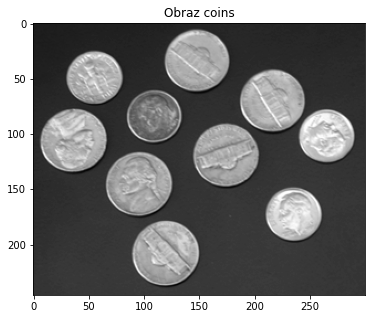

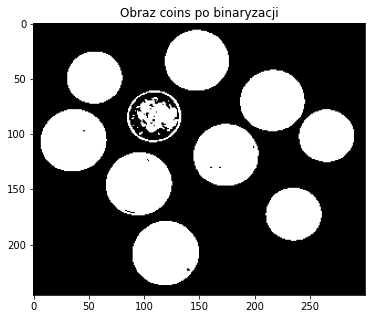

0


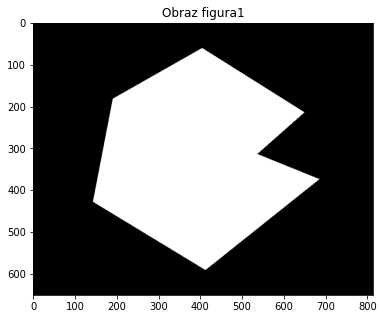

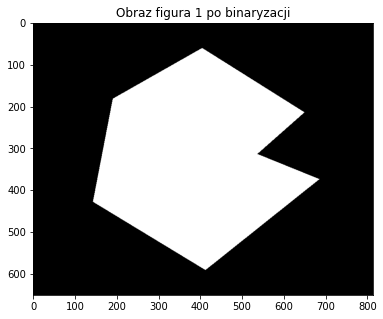

0


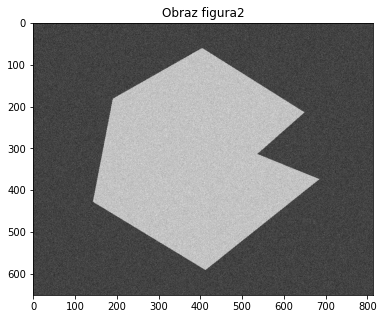

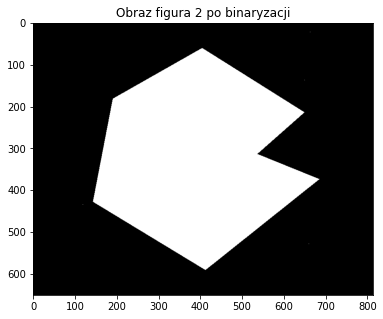

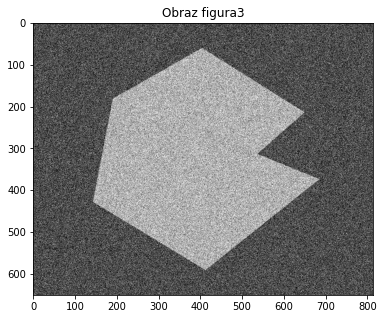

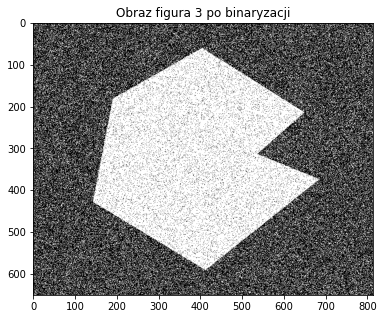

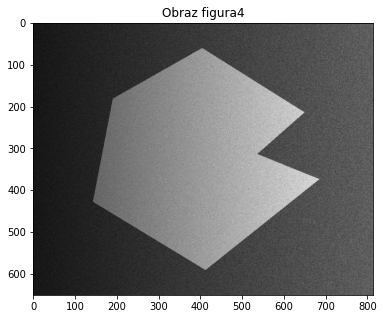

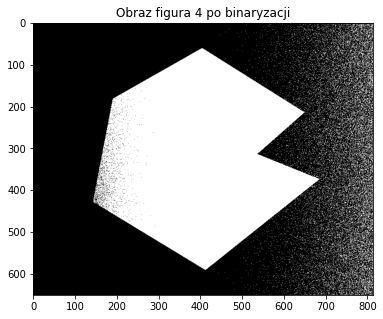

In [5]:
figura1 = cv2.imread("figura1.png", cv2.IMREAD_GRAYSCALE)
figura2 = cv2.imread("figura2.png", cv2.IMREAD_GRAYSCALE)
figura3 = cv2.imread("figura3.png", cv2.IMREAD_GRAYSCALE)
figura4 = cv2.imread("figura4.png", cv2.IMREAD_GRAYSCALE)
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)



def automatic_binar(image):
    
    H = cv2.calcHist([image],[0], None, [256],[0,256])
    
    
    H_cs = H.cumsum()
    
    
    H=np.squeeze(H)

   

    histogram_cumu_normalized=(H_cs/(image.shape[0]*image.shape[1]))
   
    H_norm=(H/(image.shape[0]*image.shape[1]))

    m_g = 0
    for i in range(np.size(H_norm)):
        m_g += i*H_norm[i]
    
    k = int(m_g)
    
    L = 256
    while True:
        P0_k = histogram_cumu_normalized[k]
        
        m0 = (1/P0_k)*(np.dot(np.arange(k+1),H_norm[0:(k+1)]))
        P1_k = 1-P0_k
        m1 = (1/P1_k)*np.dot(np.arange(k+1,L-1),H_norm[(k+1):(L-1)])
        k_new = int((m0+m1)/2)
        if np.abs(k_new-k) < 1:
            return k
            break
        else:
            k = int(k_new)


print("Próg dla obrazu coins",automatic_binar(coins))
print("Próg dla obrazu figura1",automatic_binar(figura1))
print("Próg dla obrazu figura2",automatic_binar(figura2))
print("Próg dla obrazu figura3",automatic_binar(figura3))
print("Próg dla obrazu figura4",automatic_binar(figura4))
    
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
plt.title("Obraz coins")
show(coins)

plt.title("Obraz coins po binaryzacji")
show(binaryzacja(coins, automatic_binar(coins)))
print(automatic_binar(coins))


figura1 = cv2.imread("figura1.png", cv2.IMREAD_GRAYSCALE)
plt.title("Obraz figura1")
show(figura1)

plt.title("Obraz figura 1 po binaryzacji")
show(binaryzacja(figura1, automatic_binar(figura1)))
print(automatic_binar(figura1))




figura2 = cv2.imread("figura2.png", cv2.IMREAD_GRAYSCALE)
plt.title("Obraz figura2")
show(figura2)

plt.title("Obraz figura 2 po binaryzacji")
show(binaryzacja(figura2, automatic_binar(figura2)))




figura3 = cv2.imread("figura3.png", cv2.IMREAD_GRAYSCALE)
plt.title("Obraz figura3")
show(figura3)

plt.title("Obraz figura 3 po binaryzacji")
show(binaryzacja(figura3, automatic_binar(figura3)))



figura4 = cv2.imread("figura4.png", cv2.IMREAD_GRAYSCALE)
plt.title("Obraz figura4")
show(figura4)

plt.title("Obraz figura 4 po binaryzacji")
show(binaryzacja(figura4, automatic_binar(figura4)))


Dla obrazów : figura1 i figura2 wynik binaryzacji jest satysfakcjonujący, w  obraie figura3 są widoczne szumy, a na obrazie figura4 pojawiły si różnice w kolorycie tła - część po prawej stronie jest jasna, a po lewej ciemna.

#### Metoda Otsu

Jednym z częściej wykorzystywanych algorytmów wyznaczania progu jest metoda zaproponowana w roku 1979 przez Nobuyuki Otsu w artykule pt. "A Threshold Selection Method from Gray-Level Histograms" (można odszukać na IEEE Xplore).
W algorytmie zakłada się, że obraz zawiera piksele należące do dwóch klas (obiektów i tła) tj. histogram obrazu jest bi-modalny (ma dwa maksima).
Próg podziału obliczany jest tak, aby wariancja międzyklasowa była maksymalna.
W tym sensie metodę Otsu można nazwać optymalną.

Wprowadźmy teraz wskaźnik "jakości" wybranego progu podziału $k$, który będziemy optymalizować.
W algorytmie Otsu jest to:

\begin{equation}
\tag{11}
\eta(k) = \frac{\sigma^2_B(k)}{\sigma^2_G}
\end{equation}
gdzie:  $\sigma^2_G$ - wariancja globalna, która może zostać obliczona na podstawie momentów statystycznych jako:

\begin{equation}
\tag{12}
\sigma^2_G =  \sum_{i=0}^{L-1} (i - m_G)^2 p_i
\end{equation}
a $\sigma^2_B$ jest wariancją międzyklasową, która jest zdefiniowana jako:
\begin{equation}
\tag{13}
\sigma^2_B(k) =  P_0(k)(m_0(k) - m_G)^2 + P_1(k)(m_1(k) - m_G)^2
\end{equation}
Równianie to można również przekształcić do:
\begin{equation}
\tag{14}
\sigma^2_B(k) =  P_0(k)P_1(k)(m_0(k) - m_1(k))^2 = \frac{(m_G P_0(k) - m(k) )^2}{P_0(k)(1-P_0(k))}
\end{equation}
gdzie:
\begin{equation}
\tag{15}
m(k) = \sum_{i=0}^{k} i p_i
\end{equation}

Taki zapis pozwala przyspieszyć obliczenia.
Wartość $m_G$ wyznaczana jest jednokrotnie, a zachodzi tylko potrzeba obliczania $m(k)$ i $P_0(k)$ w każdej iteracji.
Warto też zwrócić uwagę, że równanie ma sens dla $P_0 > 0$.

Warto zauważyć, że z postaci równania $(14)$ wynika, że im większa odległość pomiędzy średnimi $m_0$ i $m_1$ tym wartość wariancji międzyklasowej jest większa.
Pokazuje to, że przyjęty współczynniki może być podstawą do separacji dwóch klas - im jego wartość jest większa, tym lepsze rozdzielenie.
Dodatkowo, z równania $(11)$ wynika, że $\eta(k)$ zależy tylko od wariancji międzyklasowej $\sigma^2_B(k)$, gdyż wariancja globalna $\sigma^2_G$ jest stała.
Zatem w procesie optymalizacji należy dążyć do maksymalizacji wskaźnika $\eta$.

Należy też pamiętać, że współczynnik jest poprawnie określony tylko dla wartości $\sigma^2_G > 0$.
Przy czym, wartość $0$ może on przyjąć tylko dla obrazu o jednym poziomie szarości - w takim przypadku trudno mówić o podziale pikseli na dwie klasy (skoro występuje tylko jedna).

Ostatecznie optymalny próg binaryzacji $\bar{k}$ wyliczamy na podstawie zależności:
\begin{equation}
\tag{16}
\sigma^2_B(\bar{k}) \max\limits_{l \in[0,L-1]} {\sigma^2_B(k) }
\end{equation}

Uwagi:
- może się zdarzyć, że znajdziemy więcej niż jedno maksimum tj. więcej wartości $\bar{k}$.
  W takim przypadku zwykle zakłada się, że próg będzie średnią otrzymanych wartości.
- liczby $P_0(\bar{k})$ i $P_1(\bar{k})$ odpowiadają powierzchni zajmowanej przez obiekty klas $C_0$ i $C_1$.
- liczby $m_0(\bar{k})$ i $m_1(\bar{k})$ odpowiadają średniej jasności obiektów klas $C_0$ i $C_1$.
- wartość parametru $\eta(\bar{k})$ określa "jakość" wyznaczonego progu -- im większa tym lepiej.

Zadanie: wykorzystując podane powyżej informacje należy zaimplementować metodę wyznaczania progu binaryzacji zaproponowaną przez Otsu.

1. Wczytaj obraz _coins.png_.
      Wyświetl go.

2. Wyznacz jego histogram znormalizowany oraz oblicz średnią jasność (można do tego wykorzystać histogram) - kod zbliżony do stworzonego wcześniej.

3. Zdefiniuj 256-elementowy wektor na współczynniki $\sigma_B^2$ (funkcja `np.zeros`).

4. W pętli po możliwych wartościach progu binaryzacji wyznacz wartość $\sigma_B^2(k)$ na podstawie zależności $(14)$.
      Uwagi:
      - wcześniejszego liczenia wartości $P_0(k)$ i $m(k)$ można uniknąć inkrementując wartośc $P_0, m$  w każdej iteracji.
      - należy pamiętać, że równanie ma sens tylko dla $0 < P_0(k) < 1$. <br>

5. Wyświetl przebieg $\sigma_B^2(k)$.
      Wykorzystaj funkcję `plt.plot`.

6. Wyznacz wartość $\bar{k}$ dla której współczynnik $\sigma_B^2$ jest maksymalny.
	  Można to zrobić poprzez dodanie instrukcji w pętli (rozwiązanie bardziej elegancie) lub wykorzystując funkcję `max` (rozwiązanie dla leniwych).
	  Uwaga. Proszę pominąć obsługę przypadków niejednoznacznego maksimum.

7. Zbinaryzuj obraz wykorzystując otrzymany próg.
      Porównaj wyniki z rezultatem binaryzacji "ręcznej".

8. W OpenCV dostępna jest implementacja metody Otsu - funkcja `cv2.threshold` z parametrem `cv2.THRESH_OTSU`.
      Funkcja zwraca zbinaryzowany obraz oraz próg.
      Wykonaj binaryzację obrazu _coins.png_ metodą Otsu.
      Porównaj wyniki z własną implementacją - powinno wyjść tak samo (tzn. taki sam próg).

9. Przeprowadź eksperyment również na obrazie _rice.png_ i _catalogue.png_

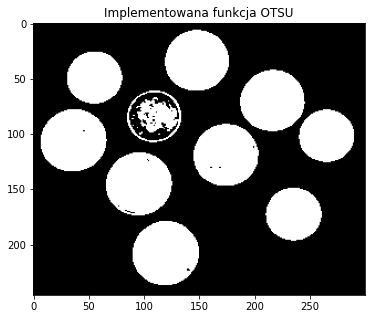

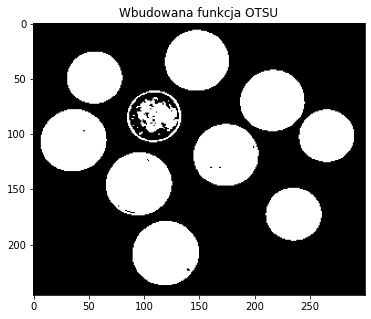

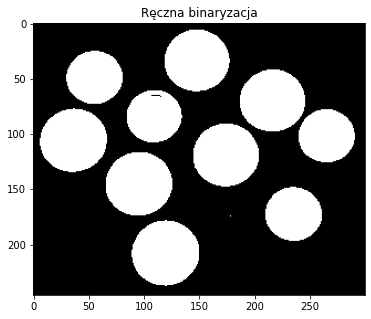

In [6]:
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
def OTSU(image):
    H = cv2.calcHist([image],[0], None, [256],[0,256])
    
    H_cs = H.cumsum()
    H = np.squeeze(H)
    H_norm=(H/(image.shape[0]*image.shape[1]))
    histogram_cumu_normalized=(H_cs/(image.shape[0]*image.shape[1]))

    m_g = 0
    for i in range(np.size(H_norm)):
        m_g += i*H_norm[i]
    
    sigma_b = np.zeros(256)
    
    for k in range(256):
        P0_k = histogram_cumu_normalized[k]
        
        if P0_k>0 and P0_k<1:
            m_k = np.dot(np.arange(k+1),H_norm[0:k+1])
            sigma_k_licznik = (m_g*P0_k-m_k)**2
            sigma_k_mianownik = P0_k*(1-P0_k)
            sigma_b[k]= sigma_k_licznik/sigma_k_mianownik

    #plt.plot(sigma_b)
    maximum = max(sigma_b)
    for i in range(np.size(sigma_b)):
        if sigma_b[i] == maximum:
            thre = i
    #figHist1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
    #ax1.plot(sigma_b)
    #ax2.imshow(binaryzacja(image,thre),'gray')
    #plt.xticks(np.arange(0, 256, 20.0))
    plt.rcParams["figure.figsize"] = (10,5)
    #ax1.grid()
    return thre, sigma_b




def compare(image,string,name,p):
    plt.imshow(binaryzacja(image,OTSU(image)[0]), "gray")
    plt.title("Implementowana funkcja OTSU")
    plt.show()

    
    plt.imshow(cv2.threshold(image,127,255,cv2.THRESH_OTSU)[1], "gray")
    plt.title("Wbudowana funkcja OTSU")
    plt.show()

    name = cv2.imread(string, cv2.IMREAD_GRAYSCALE)
    plt.imshow(binaryzacja(name,p), "gray")
    plt.title("Ręczna binaryzacja")
    plt.show()

compare(coins,"coins.png",coins,90)



Rezultat z funkcji zaimplementowanej jest taki sam, jak z wbudowanej funkcji OTSU.

Próg wyliczony dla obrazu rice 131
Próg wyliczony dla obrazu catalogue 128
Próg dla obrazu rice z funkcji wbudowanej 131.0
Próg dla obrazu catalogue z funkcji wbudowanej 128.0


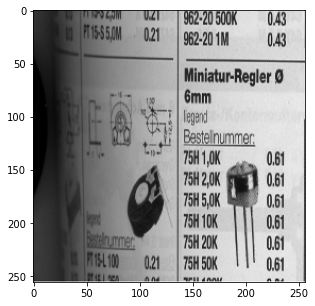

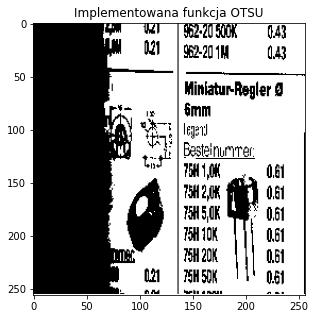

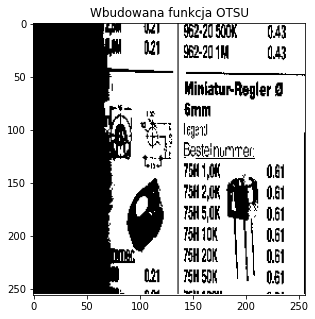

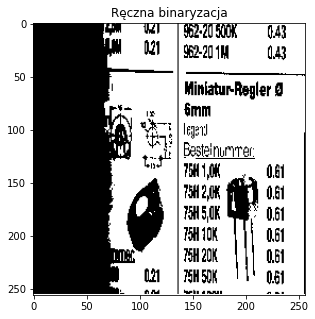

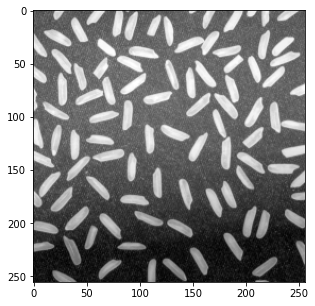

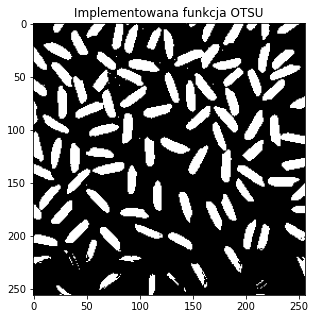

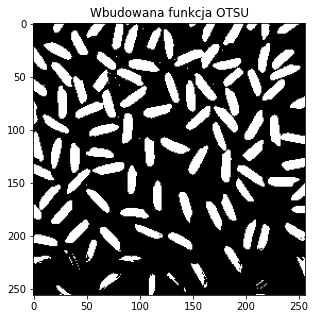

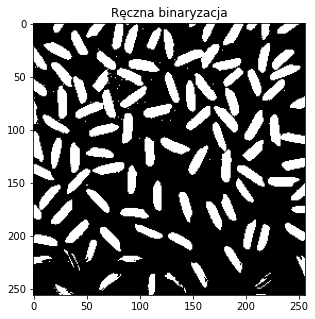

In [7]:

rice = cv2.imread("rice.png",cv2.IMREAD_GRAYSCALE)
catalogue = cv2.imread("catalogue.png",cv2.IMREAD_GRAYSCALE)



print("Próg wyliczony dla obrazu rice", OTSU(rice)[0])
print("Próg wyliczony dla obrazu catalogue",OTSU(catalogue)[0])
print("Próg dla obrazu rice z funkcji wbudowanej",cv2.threshold(rice,127,255,cv2.THRESH_OTSU) [0])
print("Próg dla obrazu catalogue z funkcji wbudowanej",cv2.threshold(catalogue,127,255,cv2.THRESH_OTSU)[0])


plt.imshow(catalogue,'gray')
plt.show()
compare(catalogue,"catalogue.png",catalogue,128)
plt.imshow(rice,'gray')
plt.show()
compare(rice,"rice.png",catalogue,128)


Progi wyliczone funkcjami wbudowanymi i własnoręcznie implementowanymi okazały się takie same. Dla obrazu catalogue widoczny problem - czarny pasek po lewej stronie. Funkcja nie sprawdza się dla obrazów o niejednorodnym oświetleniu

Progi wyliczone funkcją zaimplementowaną okazały się ponowanie takie same, jak z funkcji wbudowanej, co świadczy o poprawności implementacji.

### Binaryzacja lokalna


Analiza wyników binaryzacji dla obrazów _rice.png_ i _catalogue.png_ pokazuje, że globalna binaryzacja nie najlepiej działa dla obrazów o niejednorodnym oświetleniu.
Dla obu obrazów trudno również wyznaczyć odpowiedni próg "ręcznie".

Metodą, która pozwala poprawić wyniki binaryzacji, jest binaryzacja lokalna (niekiedy zwana adaptacyjną).
W jednym z wariantów polega ona na wyznaczeniu progu osobno dla każdego piksela na podstawie jego otoczenia (tj. własności jego kontekstu, okna).

1. Dla uproszczenia zakładamy, że obraz ma rozmiar $256 \times 256$ pikseli. Przyjmijmy okno analizy o rozmiarze 15 pikseli.

2. Najprostsza wersja binaryzacji lokalnej zakłada, że próg binaryzacji dla danego okna to średnia z pikseli w tym oknie.

3. Wczytaj obraz _rice.png_. Rozmiar obrazka (`X,Y`) można uzyskać stosując taką składnię: `(X, Y) = obraz.shape`.

4. Podstawą algorytmu są dwie pętle `for` iterujące po pikselach obrazka:


        for j in range(W/2, Y-W/2):
    
	        for i in range(W/2, X-W/2):


5. Wewnątrz pętli należy dla każdego piksela wyciąć jego otoczenie o rozmiarze `w` (operator `:`), wyznaczyć z niego średnią (metoda `mean`) i na jej podstawie dokonać binaryzacji.

6. Wyświetl obrazy oryginalny i zbinaryzowany.

7. Zaobserwuj rezultaty działania metody dla obrazów _rice.png_ i _catalogue.png_.
      Poeksperymentuj z rozmiarem okna (proszę nie przesadzać z rozmiarem, gdyż istotnie wpływa on na czas obliczeń).
      Jaka jest podstawowa wada zaimplementowanej metody? (pomijając złożoność obliczeniową).
      Proszę się zastanowić co jest źródłem błędów.

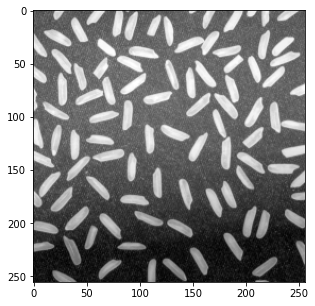

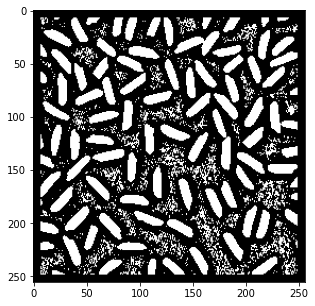

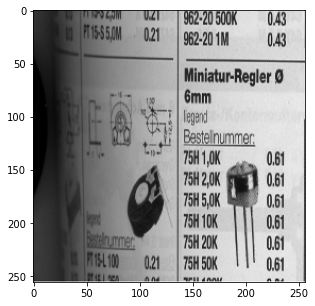

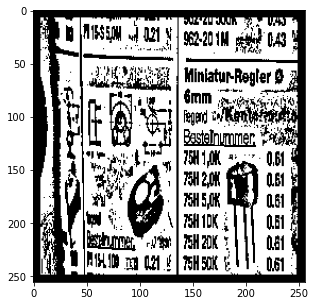

In [8]:
rice = cv2.imread("rice.png", cv2.IMREAD_GRAYSCALE)
catalogue = cv2.imread("catalogue.png", cv2.IMREAD_GRAYSCALE)
def loc_bin(image, size):
   
    (X,Y) = image.shape
    new_image = np.zeros(image.shape)
    W = size
    w = int(W/2)
    for j in range(w, Y-w):
        for i in range(w, X-w):
            plane = image[(i-w):(i+w),(j-w):(j+w)]
            mean = np.mean(plane)
            new_image[i][j] = image[i][j] > mean
    return new_image
            
show(rice)
show(loc_bin(rice,15))
show(catalogue)
show(loc_bin(catalogue,15))

Uzyskano lepszy rezulat dla obrazu catalogue - naprawiono problem wystepujący przy niejednorodnym oświetleniu.

8. Jakość działania binaryzacji lokalnej można poprawić wyznaczając próg za pomocą metody Sauvoli i Pietikainena zaproponowanej w artykule *Adaptive document image binarization*.
Wykorzystuje ona, oprócz średniej, informację o odchyleniu standardowym w danym oknie.
Próg binaryzacji wyznaczany jest na podstawie zależności:
\begin{equation}
\tag{17} 
T = srednia * (1 \pm k * ( \frac{odchStd}{R}-1 ) )
\end{equation}
gdzie: $k$ i $R$ to parametry ($R$ zwykle $128$, a $k$ na początek przyjmij $0.15$), $srednia$ i $odchStd$ to odpowiednio średnia i odchylenie standardowe wyliczone w oknie.

9. Zaimplementuj algorytm Sauvoli - wykorzystaj do wyznaczenia średniej i odchylenia metody `mean()` oraz `std()` liczone dla wycinka (podobnie jak średnia w poprzedniej metodzie).
      
10. Uruchom metodę (uwaga - czas obliczeń nie jest krótki). Przeanalizuj wyniki. Zwróć uwagę, że dodanie informacji o odchyleniu standardowym powinno *poprawić* wyniki binaryzacji.
      Jeżeli dzieje się inaczej, to najprawdopodobniej implementacja zawiera błąd. 
     
11. Zastanów się nad znaczeniem symbolu $\pm$ we wzorze na próg. 
      Kiedy należy zastosować znak $+$, a kiedy $-$.

12. Porównaj jakość binaryzacji lokalnej metodą Sauvoli i z progiem na podstawie średniej. 
      Poeksperymentuj z rozmiarem okna i parametrem k (dla obrazów _rice.png_ i _catalogue.png_).

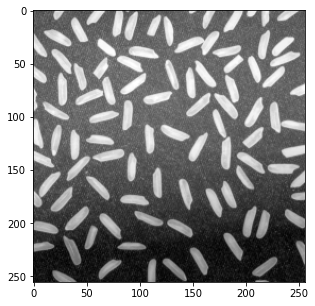

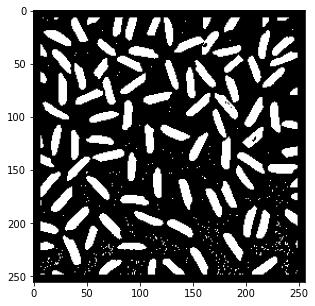

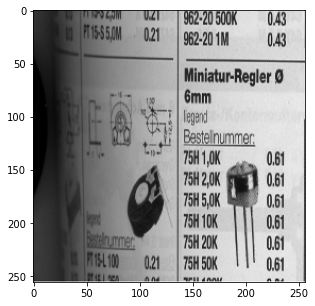

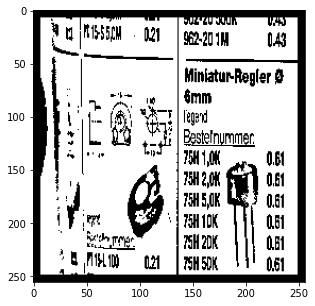

In [9]:
rice = cv2.imread("rice.png", cv2.IMREAD_GRAYSCALE)
catalogue = cv2.imread("catalogue.png", cv2.IMREAD_GRAYSCALE)
def loc_bin_suv_minus(image, size, R,k):
   
    (X,Y) = image.shape
    new_image = np.zeros(image.shape)
    W = size
    w = int(W/2)
    for j in range(w, Y-w):
        for i in range(w, X-w):
            plane = image[(i-w):(i+w),(j-w):(j+w)]
            mean = np.mean(plane)*(1 - k*(np.std(plane)/R - 1))
            new_image[i][j] = image[i][j] > mean
    return new_image


def loc_bin_suv_plus(image, size, R,k):
   
    (X,Y) = image.shape
    new_image = np.zeros(image.shape)
    W = size
    w = int(W/2)
    for j in range(w, Y-w):
        for i in range(w, X-w):
            plane = image[(i-w):(i+w),(j-w):(j+w)]
            mean = np.mean(plane)*(1 + k*(np.std(plane)/R - 1))
            new_image[i][j] = image[i][j] > mean
    return new_image

show(rice)
show(loc_bin_suv_minus(rice,15,128,0.15))
show(catalogue)
catalogue = cv2.imread("catalogue.png", cv2.IMREAD_GRAYSCALE)
show(loc_bin_suv_plus(catalogue,15,128,0.15))
    

Rezultaty są bardziej wyraziste, nie ma "przebarwień" w porównaniu do funkcji z progiem na podstawie średniej. Znak -/+ wybieramy pod względem dominującego koloru. DLa rice powinien być "-", a dla catalogue "+".

### Binaryzacja dwuprogowa

Binaryzację można przeprowadzić wykorzystując więciej niż jedn próg.
Przykładem jest binaryzacja dwuprogowa - wybieramy w ten sposób przedział jasności (piksele w nim zawarte klasyfikujemy jako obiekty).

1. Wczytaj obraz _bart.png_. 
Wyświetl go, wyznacz i wyświetl jego histogram.
Oceń, który fragment histogramu odpowiada kolorowi skóry Barta Simpsona.
W tym celu wyświetl obraz wykorzystując funkcję cv2.imshow("Tytuł okna", obraz) i wykorzystaj fakt, że przemieszczanie kursora po obrazie wyświetla wartości pikseli.<br>
**UWAGA 1 - W systemie Windows wartości nie wyświetlają się. Aby odczytać wartości pikseli można zapisać obrazek na dysku (`cv2.imwrite('Nazwa.png', Image)`), a następnie odczytać wartościa programem do edycji obrazów, np. *paint*.**<br>
**UWAGA 2 - NIE zamykaj okna z obrazem przez kliknięcie - okno zamknie się po wciśnięciu dowolnego klawisza klawiatury**.


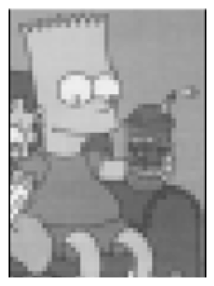

True

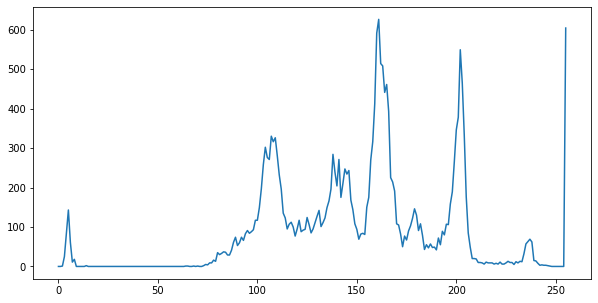

In [10]:
bart=cv2.imread("bart.png", cv2.IMREAD_GRAYSCALE)
h_bart=cv2.calcHist([bart],[0],None,[256],[0,256])
plt.imshow(bart,'gray')
plt.axis('off')
plt.show()
plt.plot(h_bart)
cv2.imwrite('xd.png', bart)

2. Przeprowadź segmentację na podstawie koloru skóry (binaryzację dwuprogową). 
      Wykorzystaj przekształcenie obrazów z wartościami True, False na wartości 1,0 i mnożenie obrazów.
 
3. Wynik wyświetl.

(-0.5, 128.5, 174.5, -0.5)

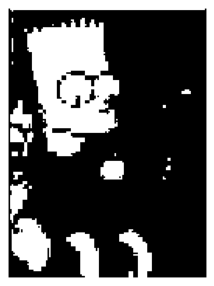

In [11]:
bart_bin=np.where(bart>150,bart,0)
bart_bin=np.where(bart_bin<175,0,1)
plt.imshow(bart_bin,'gray')
plt.axis('off')
